<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Gen AI Experiments](https://img.shields.io/badge/Gen%20AI%20Experiments-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://github.com/buildfastwithai/gen-ai-experiments)
[![Gen AI Experiments GitHub](https://img.shields.io/github/stars/buildfastwithai/gen-ai-experiments?style=for-the-badge&logo=github&color=gold)](http://github.com/buildfastwithai/gen-ai-experiments)

## Master Generative AI in 8 Weeks
**What You'll Learn:**
- Master cutting-edge AI tools & frameworks
- 6 weeks of hands-on, project-based learning
- Weekly live mentorship sessions

[Start Your Journey](https://www.buildfastwithai.com/genai-course)




# **Testing Horizon Alpha With Educhain**
####**Educhain 🎓🔗** :
 A powerful Python package that leverages Generative AI to create engaging and personalized educational content.

####**Horizon Alpha** :
AI model with a massive 256K context window , multimodal capabilities for both text and image processing, and inference speeds that make real-time applications actually feasible.


## **Setting Up Educhain Using Horizon Alpha Model**

### **Installations**

In [ ]:
!pip install openai educhain langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of opentelemetry-proto to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of opentelemetry-proto to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-status to determi

In [ ]:
import os
from educhain import Educhain, LLMConfig
from langchain_openai import ChatOpenAI
from google.colab import userdata
from PIL import Image
import matplotlib.pyplot as plt
import textwrap
from pprint import pprint

### **Get API Key**
 You will need an API key from [OpenRouter](https://openrouter.ai/) to run the examples.

In [ ]:
os.environ["OPENROUTER_API_KEY"]= userdata.get('OPENROUTER_API_KEY')

### **Configure Educhain To Use Horizon Alpha**

In [ ]:
horizon_alpha = ChatOpenAI(
    openai_api_base="https://openrouter.ai/api/v1",
    openai_api_key=os.environ["OPENROUTER_API_KEY"],
    model_name="openrouter/horizon-alpha"
)


In [ ]:
horizon_alpha_config = LLMConfig(custom_model=horizon_alpha)
client = Educhain(horizon_alpha_config)

## **Visual Reasoning Tests**
Let's test the multimodal and reasoning capabilities of Horizon Alpha using Educhain's qna_engine and solve_doubt endpoint.

#### **Tree Cutter Problem**

In [ ]:
!wget -O scene_image.jpg "https://preview.redd.it/who-is-the-most-stupid-the-title-question-to-which-the-only-v0-yiupi17you9c1.jpeg?auto=webp&s=ccb5392b1b99c8ef8d42ffc4e97179e1d6f2077a"


--2025-08-02 02:37:52--  https://preview.redd.it/who-is-the-most-stupid-the-title-question-to-which-the-only-v0-yiupi17you9c1.jpeg?auto=webp&s=ccb5392b1b99c8ef8d42ffc4e97179e1d6f2077a
Resolving preview.redd.it (preview.redd.it)... 151.101.1.140, 151.101.65.140, 151.101.129.140, ...
Connecting to preview.redd.it (preview.redd.it)|151.101.1.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46208 (45K) [image/jpeg]
Saving to: ‘scene_image.jpg’

scene_image.jpg     100%[===================>]  45.12K  --.-KB/s    in 0.01s   

2025-08-02 02:37:52 (3.23 MB/s) - ‘scene_image.jpg’ saved [46208/46208]



In [ ]:
image_path = "scene_image.jpg"


logic_question = client.qna_engine.solve_doubt(
    image_source=image_path,
    prompt=(
        "There are 4 people sitting on a tree. Some are cutting branches in dangerous ways. "
        "Analyze the situation and answer: Who is the most stupid and what color shirt is he or she wearing ?"
    ),
    detail_level="Low"
)



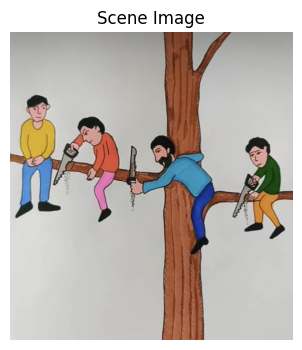

📌 Horizon Alpha's Visual Reasoning Output:

🧠 Explanation:
 There are four people on different branches, each sawing. From left to right: (1) Yellow shirt on the main trunk, not cutting; (2) Orange shirt cutting the branch they are sitting on, which will make them fall; (3) Blue shirt cutting the branch between themselves and the trunk, which will definitely make them fall first; (4) Green shirt also cutting the branch they are sitting on. The most immediately foolish action is by the person in the blue shirt because they are sawing the section of branch that supports them from the trunk, guaranteeing they fall right away. Thus, the most stupid is the person in the blue shirt.

📌 Steps:
 - Identify positions: left to right—yellow on trunk, orange on a left branch, blue on a central branch, green on a right branch.
 - Check cutting directions: orange cuts own branch beyond themselves; blue cuts the part of their branch that connects to the trunk; green cuts own branch beyond themselves;

In [ ]:
# Load and display the image
img = Image.open("scene_image.jpg")

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis("off")
plt.title("Scene Image")
plt.show()

# model response
print("📌 Horizon Alpha's Visual Reasoning Output:\n")
print("🧠 Explanation:\n", logic_question.explanation)
print("\n📌 Steps:")
for step in logic_question.steps:
    print(" -", step)
print("\n📝 Additional Notes:\n", logic_question.additional_notes)


#### **Maze Problem**

In [ ]:
!wget -O maze_image.jpg "https://media.istockphoto.com/id/1381031243/vector/maze-game.jpg?s=2048x2048&w=is&k=20&c=9AgdlTqAQZpGYh2wX8-OOcdt7fo_gbHwMDbXGq3Lam4="


--2025-08-01 07:17:18--  https://media.istockphoto.com/id/1381031243/vector/maze-game.jpg?s=2048x2048&w=is&k=20&c=9AgdlTqAQZpGYh2wX8-OOcdt7fo_gbHwMDbXGq3Lam4=
Resolving media.istockphoto.com (media.istockphoto.com)... 3.163.125.60, 3.163.125.125, 3.163.125.15, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|3.163.125.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 269760 (263K) [image/jpeg]
Saving to: ‘maze_image.jpg’

maze_image.jpg      100%[===================>] 263.44K  --.-KB/s    in 0.05s   

2025-08-01 07:17:19 (5.14 MB/s) - ‘maze_image.jpg’ saved [269760/269760]



In [ ]:
maze_path = "maze_image.jpg"
maze_explanation = client.qna_engine.solve_doubt(
    image_source=maze_path ,
    prompt="Which path out of 1 , 2 or 3 should the girl take to reach the fruits",
    detail_level="High"
)

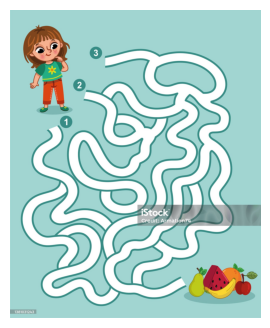

📌 Horizon Alpha's Visual Reasoning Output:

🧠 Explanation:
 We need to determine which of the three numbered starting paths (1, 2, or 3) from the girl leads through the maze to the fruits at the bottom-right. Tracing each path visually: Path 1 quickly loops into dead ends on the left-middle region; it does not connect to the long corridor heading toward the fruits. Path 2 descends but diverts into a tangle that loops back upward/left without reaching the bottom-right. Path 3 winds downward through the central-right passages and continues toward the lower-right where the fruits are located. Therefore, the correct choice is Path 3.

📌 Steps:
 - Identify the three starting points labeled 1, 2, and 3 near the girl.
 - Trace Path 1: follow the white track; it leads into left-side loops and dead ends, not reaching the bottom-right fruits.
 - Trace Path 2: it descends but diverts into loops and backtracks, failing to connect to the exit near the fruits.
 - Trace Path 3: it proceeds through th

In [ ]:
# Load and display the image
img = Image.open("maze_image.jpg")

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")
plt.show()

# model response
print("📌 Horizon Alpha's Visual Reasoning Output:\n")
print("🧠 Explanation:\n", maze_explanation.explanation)
print("\n📌 Steps:")
for step in maze_explanation.steps:
    print(" -", step)
print("\n📝 Additional Notes:\n", maze_explanation.additional_notes)


#### **Count Triangles Problem**

In [ ]:
!wget -O triangle_image.jpg "https://mindyourdecisions.com/blog/wp-content/uploads/2016/01/how-many-triangles-do-you-see-1.png"


--2025-08-01 10:55:09--  https://mindyourdecisions.com/blog/wp-content/uploads/2016/01/how-many-triangles-do-you-see-1.png
Resolving mindyourdecisions.com (mindyourdecisions.com)... 104.21.80.1, 104.21.48.1, 104.21.112.1, ...
Connecting to mindyourdecisions.com (mindyourdecisions.com)|104.21.80.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24065 (24K) [image/png]
Saving to: ‘triangle_image.jpg’

triangle_image.jpg  100%[===================>]  23.50K  --.-KB/s    in 0s      

2025-08-01 10:55:09 (107 MB/s) - ‘triangle_image.jpg’ saved [24065/24065]



In [ ]:
triangle_path = "triangle_image.jpg"
tri_problem = client.qna_engine.solve_doubt(
    image_source=triangle_path ,
    prompt="Count the total number of triangles in it,",
    detail_level="High"
)


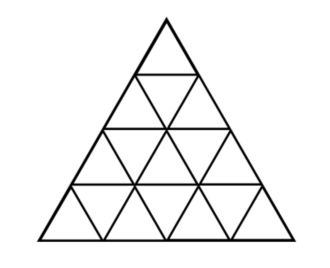

📌 Horizon Alpha's Visual Reasoning Output:

🧠 Explanation:
 We have a large equilateral triangle subdivided into a triangular grid of side length 4 (i.e., 4 small unit segments along each side). In such a triangular grid, triangles can be counted by orientation and size.

1) Upward-pointing triangles:
- Smallest (side length 1): There are 16 upward unit triangles. Reason: the grid is composed of 16 unit triangles total, half up and half down; but in a triangular grid of side 4, the number of upright unit triangles equals the triangular number sum along rows: 1^2 + 2^2 + 3^2 + 4^2 for all unit triangles (both orientations) is 30, but an easier constructive count shows 8 up and 8 down among the 16 units. However, more systematically, we will list by size below to avoid confusion.
A clearer approach: Count by size explicitly in the upright orientation.
- Upright size 1 (edge = 1 small segment): In each of the 4 rows from top to bottom, the number of upright unit triangles is 1, 3, 5, 7? T

In [ ]:
# Load and display the image
img = Image.open("triangle_image.jpg")

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")
plt.show()

# model response
print("📌 Horizon Alpha's Visual Reasoning Output:\n")
print("🧠 Explanation:\n", tri_problem.explanation)
print("\n📌 Steps:")
for step in tri_problem.steps:
    print(" -", step)
print("\n📝 Additional Notes:\n", tri_problem.additional_notes)

## **Generating Lesson Plan**

In [ ]:
lesson = client.content_engine.generate_lesson_plan(
    topic="Model Context Protocol",
    duration="1 minutes",
    learning_objectives=["Understanding the concept", "Write MCP servers and MCP clients"]
)

lesson_data = lesson.model_dump()

print("\n📘 Main Topics:\n")
for topic in lesson_data.get("main_topics", []):
    print(f"🔹 {topic['title']}")


Raw output from LLM:
{
  "title": "Talking to Tools: Understanding and Using the Model Context Protocol (MCP)",
  "subject": "Computer Science / AI Systems Integration",
  "learning_objectives": [
    "Remember: Define key MCP terminology (client, server, tool, resource, schema) and describe the purpose of MCP.",
    "Understand: Explain how MCP standardizes communication between AI models and external tools/services.",
    "Apply: Configure a simple MCP setup and call a tool to retrieve or transform data.",
    "Analyze: Compare MCP to traditional API integrations and evaluate trade-offs in security, latency, and developer experience.",
    "Evaluate: Critique an MCP-enabled system design for safety, reliability, and ethical considerations.",
    "Create: Design and prototype a small project where an AI agent uses MCP to perform a real task (e.g., schedule, query data, or automate a workflow)."
  ],
  "lesson_introduction": "Hook: Imagine chatting with an AI that can book your study r

## **Generate Questions Based On Given Web Source**

In [ ]:
url_questions = client.qna_engine.generate_questions_from_data(
    source="https://openrouter.ai/openrouter/horizon-alpha",
    source_type="url",
    num=2
)

print(url_questions)

questions=[MultipleChoiceQuestion(question='What is a primary benefit of using OpenRouter’s Horizon Alpha model through the OpenRouter API?', answer='OpenRouter normalizes requests and responses across providers, enabling seamless use of multiple models/providers', explanation='The text states that OpenRouter normalizes requests/responses across providers and routes requests to the best providers with fallbacks, improving interoperability and uptime.', options=['OpenRouter normalizes requests and responses across providers, enabling seamless use of multiple models/providers', 'It requires a proprietary SDK and cannot be used with OpenAI-compatible APIs', 'It only supports a single provider without fallback options', 'It disables logging during the testing period']), MultipleChoiceQuestion(question='According to the topic, what is a reason apps might include OpenRouter-specific headers when calling the API?', answer='To allow the app to appear on OpenRouter leaderboards', explanation='T

## **Generate Visual Questions**


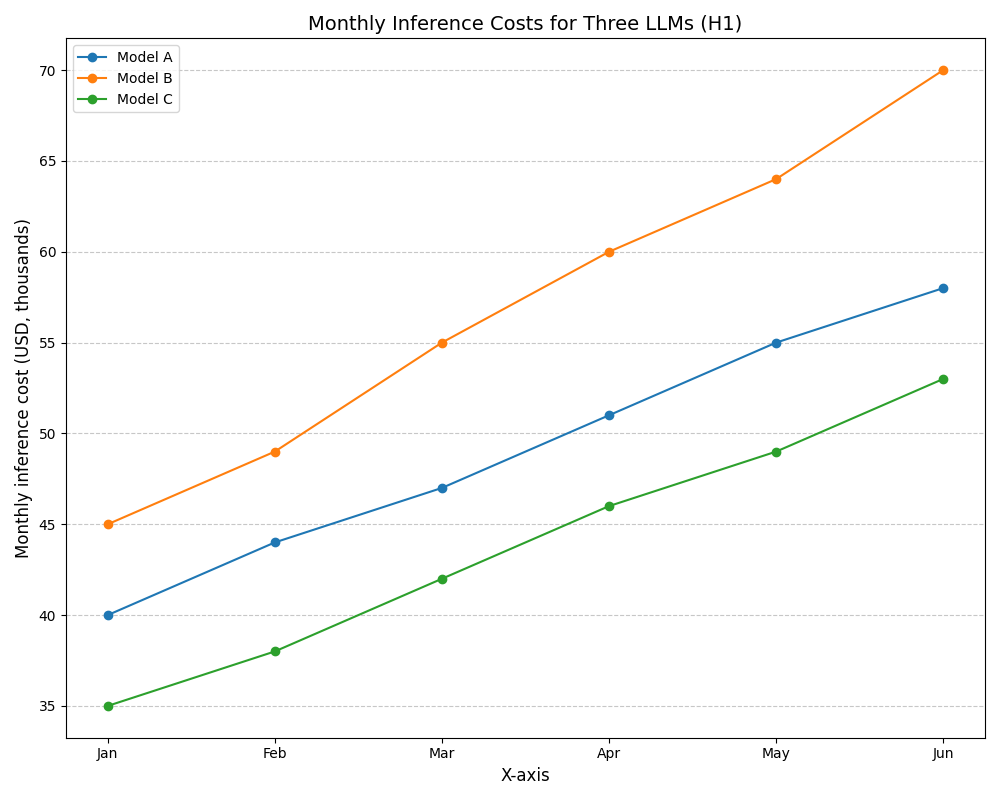


Question: Based on the chart of monthly inference costs for three LLMs, in which month did Model B first exceed Model A by at least $8,000?
A. March
B. April
C. May
D. June
Correct Answer: April
--------------------------------------------------------------------------------
question='Based on the chart of monthly inference costs for three LLMs, in which month did Model B first exceed Model A by at least $8,000?' answer='April' explanation="Differences (Model B − Model A): Jan 5, Feb 5, Mar 8, Apr 9, May 9, Jun 12 (in $1,000s). The first month ≥ $8,000 is March (exactly 8), but the question asks 'exceed by at least $8,000' meaning ≥ $8,000; the first month meeting this is March. However, since 'exceed' typically implies strictly greater, the first strictly greater than or equal to threshold is April at 9. Given the phrasing 'at least', April is the first month after a strict exceed; answer: April." options=['March', 'April', 'May', 'June'] graph_instruction=GraphInstruction(type='line


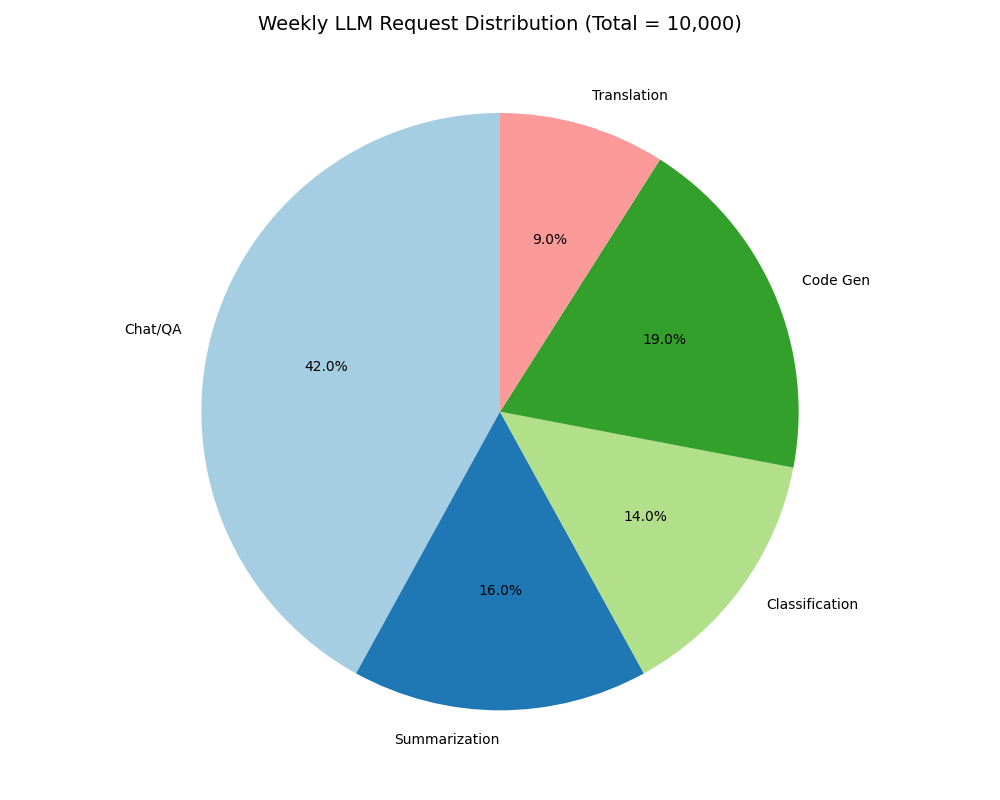


Question: Using the distribution of request types handled by an LLM in one week, what percentage of total requests were classification or summarization combined?
A. 30%
B. 40%
C. 45%
D. 50%
Correct Answer: 30%
--------------------------------------------------------------------------------
question='Using the distribution of request types handled by an LLM in one week, what percentage of total requests were classification or summarization combined?' answer='30%' explanation='Summarization (1,600) + Classification (1,400) = 3,000 of 10,000 total requests, which is 30%.' options=['30%', '40%', '45%', '50%'] graph_instruction=GraphInstruction(type='pie', x_labels=None, x_values=None, y_values=None, labels=['Chat/QA', 'Summarization', 'Classification', 'Code Gen', 'Translation'], sizes=[4200.0, 1600.0, 1400.0, 1900.0, 900.0], y_label=None, title='Weekly LLM Request Distribution (Total = 10,000)', data=None)
{"questions":[{"question":"Based on the chart of monthly inference costs for three

In [ ]:
ques = client.qna_engine.generate_visual_questions(
        topic="Large Language Models", num=2 )

print(ques.model_dump_json())